# **Weather Prediction**
### Group Number : 07
### EG/2020/3956 - Hariharasakthy N.
### EG/2020/4119 - Praveenan J.


In [ ]:
#Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Read the data file using pandas
data=pd.read_csv('/content/sample_data/Weather_Data.csv')

#Display top 5 data in the dataset
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
#(Row ,Column)
data.shape

(8784, 8)

In [ ]:
#To display  column names of the dataset
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [ ]:
#To display the data types of the all features & label
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

**Data Visualizations**

In [ ]:
# Drop the column Date/Time
data.drop(columns=['Date/Time'],axis=1,inplace=True)

In [ ]:
#Describe the datasets
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


** Preprocessing For Decision Tree**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Weather"]=le.fit_transform(data["Weather"])

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=10)
data.fit(X_train,y_train)
y_pred3=data.predict(X_test)
y_pred3

AttributeError: 'DataFrame' object has no attribute 'fit'

In [ ]:
print(classification_report(y_test,y_pred3))

In [ ]:
#Counting the occurrences of each unique value in the 'Weather' column
data.Weather.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [ ]:
#Return number of unique elements in weather column
filtered_data=data
filtered_data.Weather.nunique()

50

**Converting the Weather Categories into Standard Categories**

In [ ]:
from itertools import chain  # from itertools library import chain function


In [ ]:
def Create_list(x):
    list_of_lists=[w.split() for w in x.split(',')]
    flat_list=list(chain(*list_of_lists))
    return flat_list

def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+RAIN'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'Clear'
    elif 'Cloudy' in list1:
        return 'Cloudy'
    else:
        return 'RAIN'

In [ ]:
x='Thunderstorms,Moderate Rain Showers,Fog'

In [ ]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [ ]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [ ]:
filtered_data['Std_Weather']=filtered_data['Weather'].apply(lambda x:Get_Weather(Create_list(x)))

In [ ]:
filtered_data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [ ]:
filtered_data.Std_Weather.value_counts()

Cloudy       3797
Clear        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: Std_Weather, dtype: int64

**Sample selection and Data balancing**

In [ ]:
cloudy_df=filtered_data[filtered_data['Std_Weather']=='Cloudy'].sample(600)

In [ ]:
clear_df=filtered_data[filtered_data['Std_Weather']=='Clear'].sample(600)

In [ ]:
rain_df=filtered_data[filtered_data['Std_Weather']=='RAIN']
snow_df=filtered_data[filtered_data['Std_Weather']=='SNOW']
snow_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers,SNOW
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers,SNOW
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers,SNOW
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers,SNOW
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers,SNOW
...,...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow,SNOW
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow,SNOW
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow,SNOW
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow,SNOW


**Creating New Weather Dataset**

In [ ]:
weather_df=pd.concat([cloudy_df,clear_df,rain_df,snow_df],axis=0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
6462,9/26/2012 6:00,15.0,9.1,68,17,24.1,100.86,Cloudy,Cloudy
8346,12/13/2012 18:00,1.1,-2.0,80,19,25.0,102.01,Mostly Cloudy,Cloudy
8449,12/18/2012 1:00,0.1,-0.9,93,24,19.3,100.37,Cloudy,Cloudy
2123,3/29/2012 11:00,3.6,-2.2,66,9,24.1,100.71,Cloudy,Cloudy
373,1/16/2012 13:00,-10.1,-16.1,61,13,48.3,101.92,Cloudy,Cloudy


In [ ]:
weather_df.shape

(2359, 9)

In [ ]:
weather_df.Std_Weather.value_counts()

RAIN      603
Cloudy    600
Clear     600
SNOW      556
Name: Std_Weather, dtype: int64

In [ ]:
weather_df.drop(columns=['Date/Time','Weather'],axis=1,inplace=True)

In [ ]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
6462,15.0,9.1,68,17,24.1,100.86,Cloudy
8346,1.1,-2.0,80,19,25.0,102.01,Cloudy
8449,0.1,-0.9,93,24,19.3,100.37,Cloudy
2123,3.6,-2.2,66,9,24.1,100.71,Cloudy
373,-10.1,-16.1,61,13,48.3,101.92,Cloudy


**Duplicate Records**

In [ ]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


**Null/Missing Values**

In [ ]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [ ]:
weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Std_Weather          object
dtype: object

**Correlation among the features**

In [ ]:
cols=['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']

In [ ]:
cor_matrix=weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.941528,-0.244456,-0.143212,0.386597,-0.098800
Dew Point Temp_C,0.941528,1.000000,0.090218,-0.133848,0.182364,-0.211818
Rel Hum_%,-0.244456,0.090218,1.000000,0.041887,-0.643429,-0.338158
Wind Speed_km/h,-0.143212,-0.133848,0.041887,1.000000,-0.152790,-0.395186
Visibility_km,0.386597,0.182364,-0.643429,-0.152790,1.000000,0.321325
Press_kPa,-0.098800,-0.211818,-0.338158,-0.395186,0.321325,1.000000


**Heat map**

<Axes: >

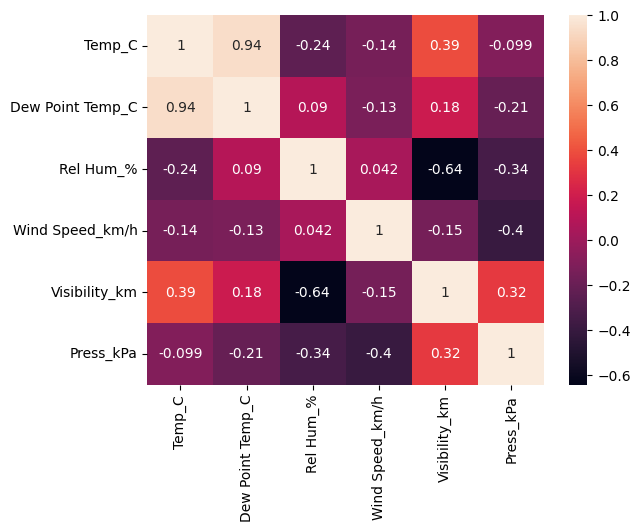

In [ ]:
sns.heatmap(cor_matrix,annot=True)

In [ ]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

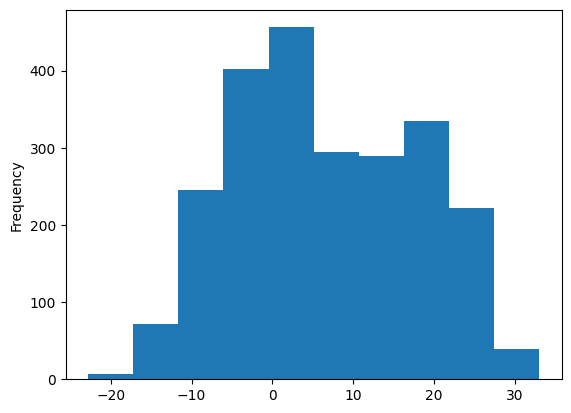

In [ ]:
weather_df['Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

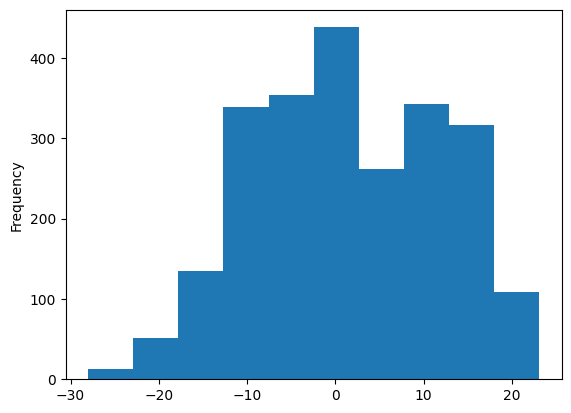

In [ ]:
weather_df['Dew Point Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

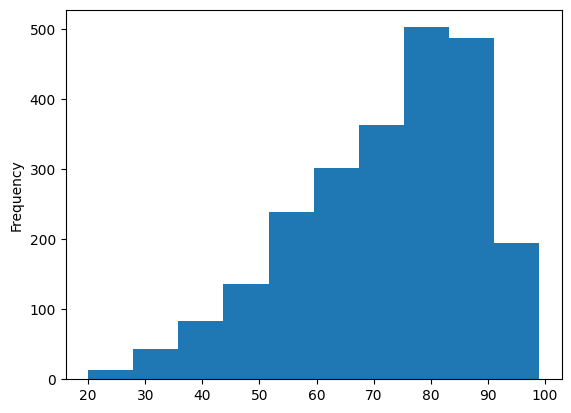

In [ ]:
weather_df['Rel Hum_%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

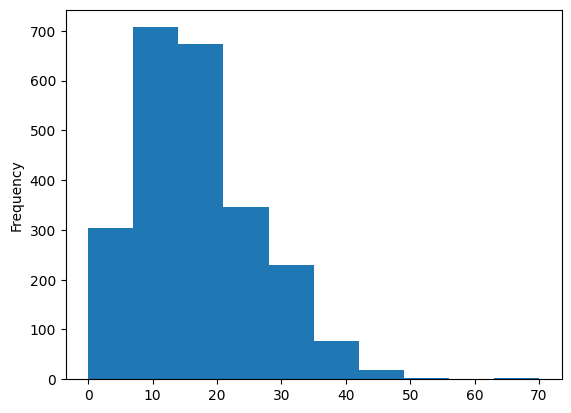

In [ ]:
weather_df['Wind Speed_km/h'].plot(kind='hist')

<Axes: ylabel='Frequency'>

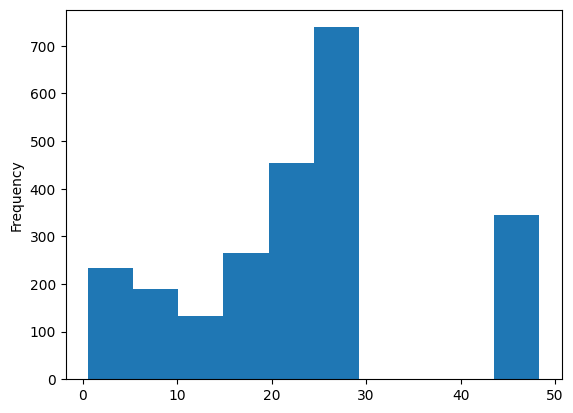

In [ ]:
weather_df['Visibility_km'].plot(kind='hist')

<Axes: ylabel='Frequency'>

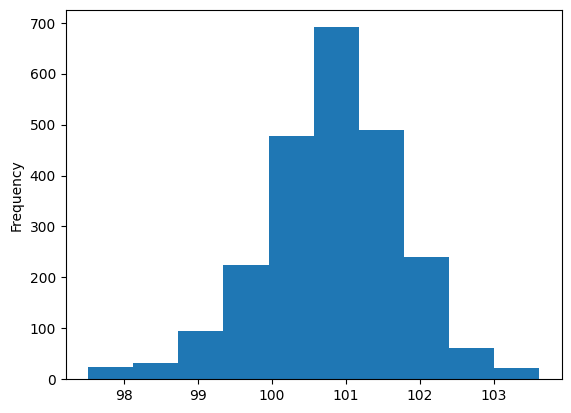

In [ ]:
weather_df['Press_kPa'].plot(kind='hist')

<Axes: >

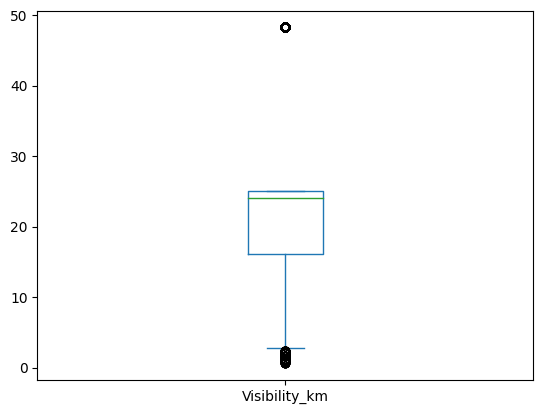

In [ ]:
weather_df['Visibility_km'].plot(kind='box')

In [ ]:
#IQR
q1=weather_df['Visibility_km'].quantile(0.25)
q3=weather_df['Visibility_km'].quantile(0.75)
iqr=q3-q1


In [ ]:
q1,q3,iqr

(16.1, 25.0, 8.899999999999999)

In [ ]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit


(2.7500000000000036, 38.349999999999994)

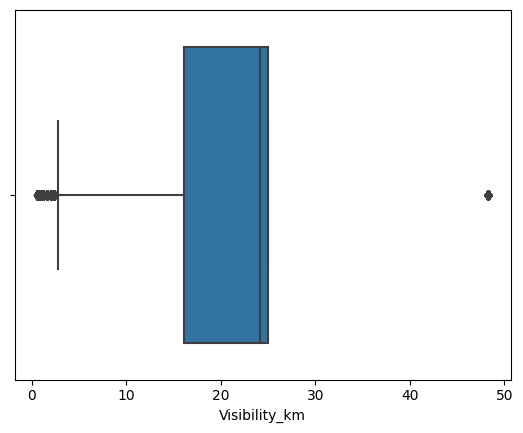

In [ ]:
#sns.boxplot(weather_df['Visibility_km'])
if 'Visibility_km' in weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=weather_df['Visibility_km'])
else:
    print("Column 'Visibility_km' not found in the DataFrame.")

In [ ]:
weather_df.loc[(weather_df['Visibility_km']>upper_limit) |(weather_df['Visibility_km']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
373,-10.1,-16.1,61,13,48.3,101.92,Cloudy
3998,24.3,5.6,30,11,48.3,102.17,Cloudy
3391,21.8,12.7,56,11,48.3,101.70,Cloudy
8195,2.6,-5.0,57,4,48.3,101.24,Cloudy
2773,8.7,0.1,55,20,48.3,100.29,Cloudy
...,...,...,...,...,...,...,...
8728,-8.5,-9.9,90,24,1.2,100.49,SNOW
8729,-9.0,-10.4,90,19,2.4,100.46,SNOW
8734,-10.1,-11.6,89,15,2.4,100.20,SNOW
8737,-9.4,-10.5,92,9,2.4,100.22,SNOW


In [ ]:
#trimming
new_weather_df=weather_df.loc[(weather_df['Visibility_km']<upper_limit) &(weather_df['Visibility_km']>lower_limit)]
print('before removing outliers:',len(weather_df))
print('after removing outliers:',len(new_weather_df))
print(' outliers:',len(weather_df)-len(new_weather_df))

before removing outliers: 2359
after removing outliers: 1902
 outliers: 457


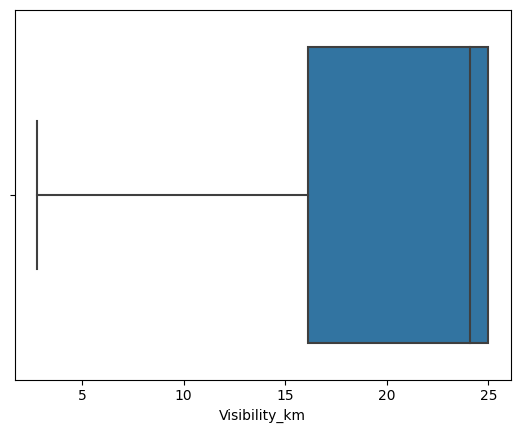

In [ ]:
if 'Visibility_km' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Visibility_km'])
else:
    print("Column 'Visibility_km' not found in the DataFrame.")

In [ ]:
#capping
new_weather_df=weather_df.copy()
new_weather_df.loc[(new_weather_df['Visibility_km']>upper_limit),'Visibility_km']=upper_limit
new_weather_df.loc[(new_weather_df['Visibility_km']<lower_limit),'Visibility_km']=lower_limit


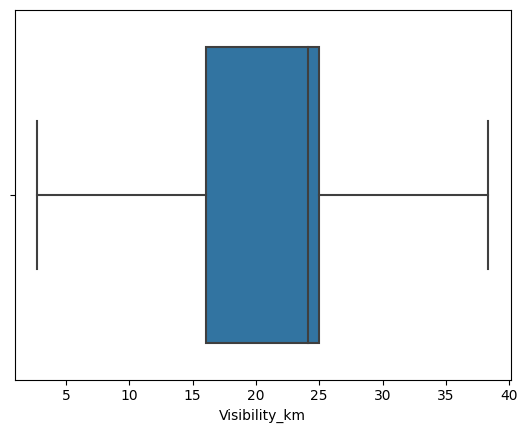

In [ ]:
if 'Visibility_km' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Visibility_km'])
else:
    print("Column 'Visibility_km' not found in the DataFrame.")

In [ ]:
#IQR
q1=weather_df['Temp_C'].quantile(0.25)
q3=weather_df['Temp_C'].quantile(0.75)
iqr=q3-q1

In [ ]:
q1,q3,iqr

(-3.1, 16.3, 19.400000000000002)

In [ ]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(-32.2, 45.400000000000006)

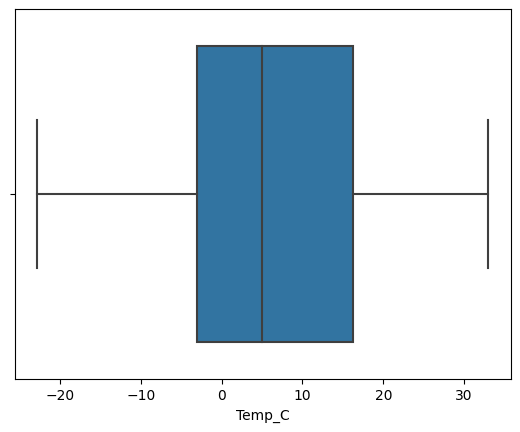

In [ ]:
#sns.boxplot(weather_df['Visibility_km'])
if 'Temp_C' in weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=weather_df['Temp_C'])
else:
    print("Column 'Temp_C' not found in the DataFrame.")

In [ ]:
weather_df.loc[(weather_df['Temp_C']>upper_limit) |(weather_df['Temp_C']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


In [ ]:
#IQR
q1=weather_df['Dew Point Temp_C'].quantile(0.25)
q3=weather_df['Dew Point Temp_C'].quantile(0.75)
iqr=q3-q1


In [ ]:
q1,q3,iqr

(-7.0, 10.4, 17.4)

In [ ]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(-33.099999999999994, 36.5)

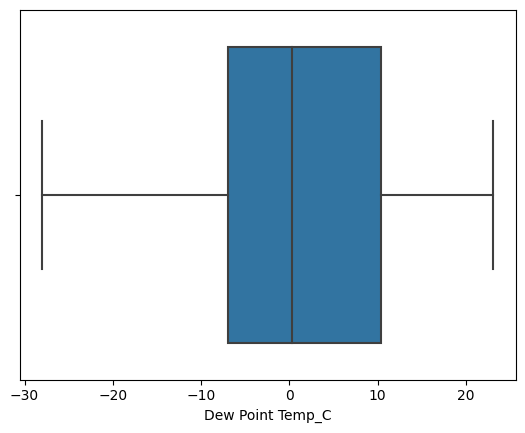

In [ ]:
#sns.boxplot(weather_df['Visibility_km'])
if 'Dew Point Temp_C' in weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=weather_df['Dew Point Temp_C'])
else:
    print("Column 'Dew Point Temp_C' not found in the DataFrame.")

In [ ]:
weather_df.loc[(weather_df['Dew Point Temp_C']>upper_limit) |(weather_df['Dew Point Temp_C']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


In [ ]:
#IQR
q1=weather_df['Rel Hum_%'].quantile(0.25)
q3=weather_df['Rel Hum_%'].quantile(0.75)
iqr=q3-q1

In [ ]:
q1,q3,iqr

(62.0, 85.0, 23.0)

In [ ]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(27.5, 119.5)

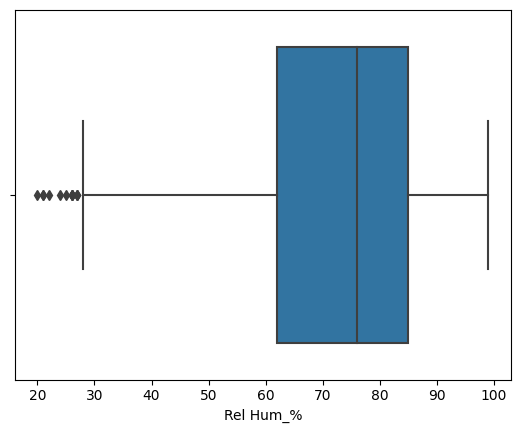

In [ ]:
#sns.boxplot(weather_df['Rel Hum_%'])
if 'Rel Hum_%' in weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=weather_df['Rel Hum_%'])
else:
    print("Column 'Rel Hum_%' not found in the DataFrame.")

In [ ]:
weather_df.loc[(weather_df['Rel Hum_%']>upper_limit) |(weather_df['Rel Hum_%']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
1989,10.8,-8.0,26,15,25.0,101.70,Cloudy
3065,21.0,-2.9,20,13,48.3,101.07,Cloudy
3328,20.5,0.9,27,19,48.3,101.64,Cloudy
2250,8.9,-9.6,26,20,48.3,100.49,Cloudy
2249,9.7,-9.0,26,28,48.3,100.52,Cloudy
2872,9.2,-11.8,21,28,48.3,101.66,Clear
2875,6.9,-11.7,25,20,48.3,101.82,Clear
2226,6.9,-13.6,22,19,48.3,100.65,Clear
2223,7.9,-10.0,27,19,48.3,100.60,Clear
2876,6.3,-11.4,27,15,25.0,101.93,Clear


In [ ]:
#trimming
new_weather_df=weather_df.loc[(weather_df['Rel Hum_%']<upper_limit) &(weather_df['Rel Hum_%']>lower_limit)]
print('before removing outliers:',len(weather_df))
print('after removing outliers:',len(new_weather_df))
print(' outliers:',len(weather_df)-len(new_weather_df))


before removing outliers: 2359
after removing outliers: 2346
 outliers: 13


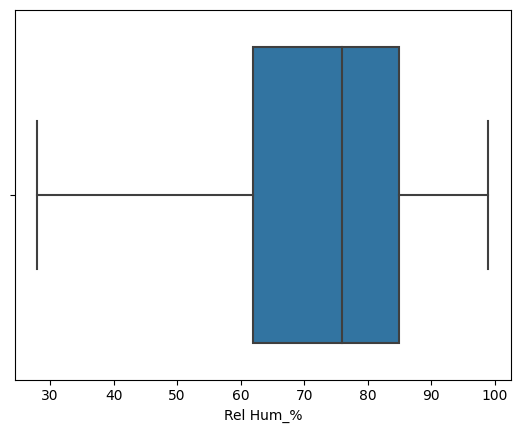

In [ ]:
if 'Rel Hum_%' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Rel Hum_%'])
else:
    print("Column 'Rel Hum_%' not found in the DataFrame.")

In [ ]:
#capping
new_weather_df=weather_df.copy()
new_weather_df.loc[(new_weather_df['Rel Hum_%']>upper_limit),'Rel Hum_%']=upper_limit
new_weather_df.loc[(new_weather_df['Rel Hum_%']<lower_limit),'Rel Hum_%']=lower_limit

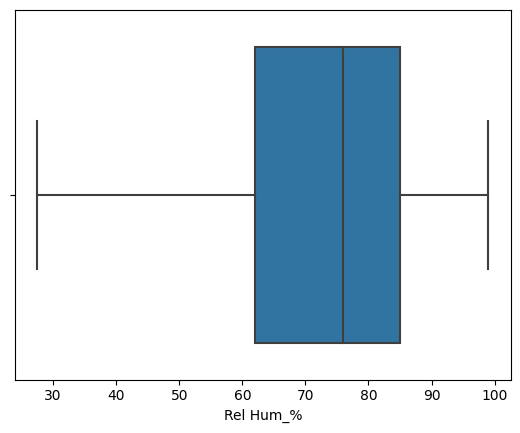

In [ ]:
if 'Rel Hum_%' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Rel Hum_%'])
else:
    print("Column 'Rel Hum_%' not found in the DataFrame.")

In [ ]:
#IQR
q1=weather_df['Wind Speed_km/h'].quantile(0.25)
q3=weather_df['Wind Speed_km/h'].quantile(0.75)
iqr=q3-q1

In [ ]:
q1,q3,iqr

(9.0, 22.0, 13.0)

In [ ]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(-10.5, 41.5)

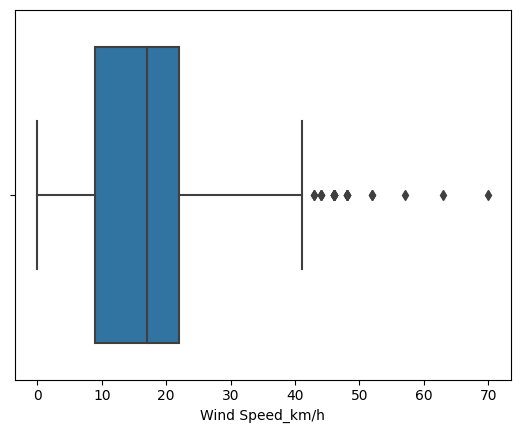

In [ ]:
if 'Wind Speed_km/h' in weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=weather_df['Wind Speed_km/h'])
else:
    print("Column 'Wind Speed_km/h' not found in the DataFrame.")

In [ ]:
weather_df.loc[(weather_df['Wind Speed_km/h']>upper_limit) |(weather_df['Wind Speed_km/h']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
410,0.5,-4.0,72,70,25.0,98.62,Cloudy
2722,3.7,1.1,83,46,24.1,99.23,Cloudy
1504,5.0,-5.0,48,63,48.3,98.67,Clear
674,0.3,-5.8,64,52,25.0,100.21,Clear
1626,10.5,7.8,83,46,6.4,99.64,RAIN
2712,1.9,-0.8,82,46,19.3,100.73,RAIN
2716,2.0,-0.7,82,44,25.0,99.82,RAIN
2717,1.9,-0.2,86,46,8.0,99.74,RAIN
2718,2.1,-0.3,84,52,16.1,99.66,RAIN
2719,2.3,-0.4,82,48,24.1,99.52,RAIN


In [ ]:
#trimming
new_weather_df=weather_df.loc[(weather_df['Wind Speed_km/h']<upper_limit) &(weather_df['Wind Speed_km/h']>lower_limit)]
print('before removing outliers:',len(weather_df))
print('after removing outliers:',len(new_weather_df))
print(' outliers:',len(weather_df)-len(new_weather_df))

before removing outliers: 2359
after removing outliers: 2335
 outliers: 24


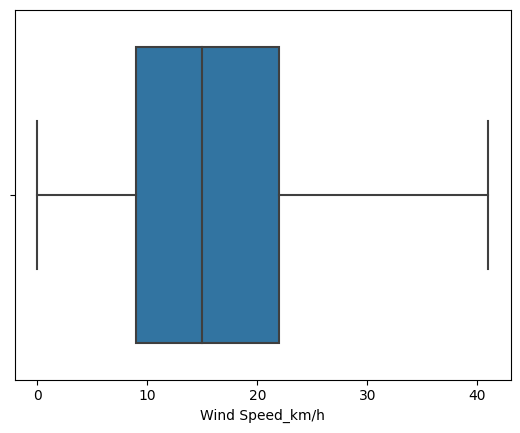

In [ ]:

if 'Wind Speed_km/h' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Wind Speed_km/h'])
else:
    print("Column 'Wind Speed_km/h' not found in the DataFrame.")

In [ ]:
#capping
new_weather_df=weather_df.copy()
new_weather_df.loc[(new_weather_df['Wind Speed_km/h']>upper_limit),'Wind Speed_km/h']=upper_limit
new_weather_df.loc[(new_weather_df['Wind Speed_km/h']<lower_limit),'Wind Speed_km/h']=lower_limit

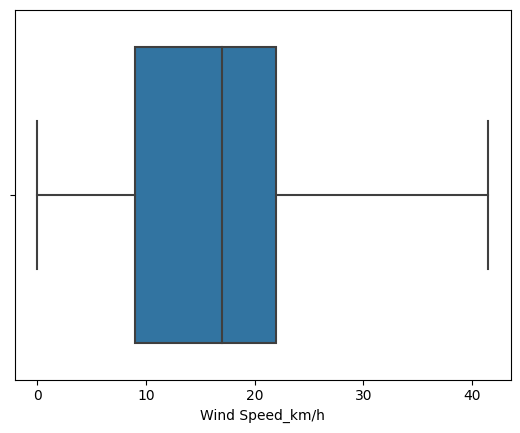

In [ ]:

if 'Wind Speed_km/h' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Wind Speed_km/h'])
else:
    print("Column 'Wind Speed_km/h' not found in the DataFrame.")

In [ ]:
#IQR
q1=weather_df['Press_kPa'].quantile(0.25)
q3=weather_df['Press_kPa'].quantile(0.75)
iqr=q3-q1

In [ ]:
q1,q3,iqr

(100.31, 101.41499999999999, 1.1049999999999898)

In [ ]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(98.65250000000002, 103.07249999999998)

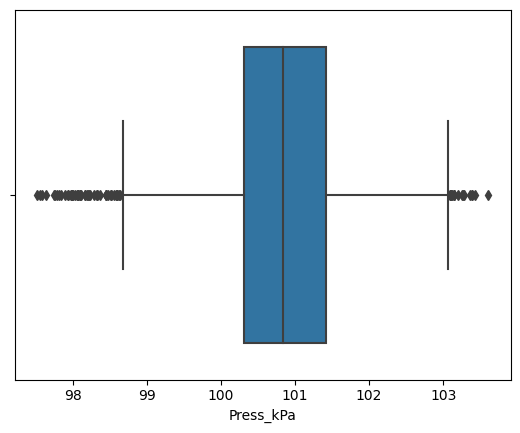

In [ ]:
if 'Press_kPa' in weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=weather_df['Press_kPa'])
else:
    print("Column 'Press_kPa' not found in the DataFrame.")

In [ ]:
weather_df.loc[(weather_df['Press_kPa']>upper_limit) |(weather_df['Press_kPa']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
7742,4.5,-10.6,32,7,48.3,103.39,Cloudy
410,0.5,-4.0,72,70,25.0,98.62,Cloudy
7746,2.6,-7.5,47,9,25.0,103.36,Cloudy
7753,-2.4,-5.9,77,6,25.0,103.15,Cloudy
7755,-3.6,-6.9,78,9,25.0,103.11,Cloudy
...,...,...,...,...,...,...,...
8549,-0.9,-1.9,93,35,4.8,98.07,SNOW
8550,-1.6,-3.0,90,41,4.0,98.19,SNOW
8551,-2.2,-3.7,89,35,4.8,98.32,SNOW
8552,-2.5,-4.5,86,41,4.0,98.44,SNOW


In [ ]:
#trimming
new_weather_df=weather_df.loc[(weather_df['Press_kPa']<upper_limit) &(weather_df['Press_kPa']>lower_limit)]
print('before removing outliers:',len(weather_df))
print('after removing outliers:',len(new_weather_df))
print(' outliers:',len(weather_df)-len(new_weather_df))

before removing outliers: 2359
after removing outliers: 2292
 outliers: 67


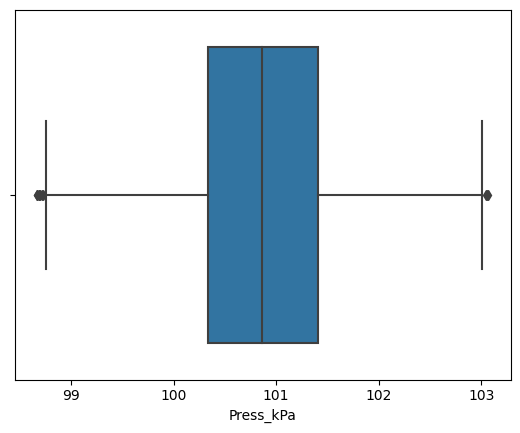

In [ ]:
if 'Press_kPa' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Press_kPa'])
else:
    print("Column 'Press_kPa' not found in the DataFrame.")

In [ ]:
#capping
new_weather_df=weather_df.copy()
new_weather_df.loc[(new_weather_df['Press_kPa']>upper_limit),'Press_kPa']=upper_limit
new_weather_df.loc[(new_weather_df['Press_kPa']<lower_limit),'Press_kPa']=lower_limit

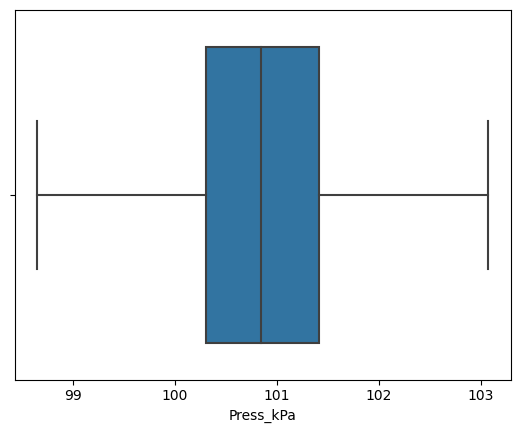

In [ ]:
if 'Press_kPa' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Press_kPa'])
else:
    print("Column 'Press_kPa' not found in the DataFrame.")

In [ ]:
new_weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
6462,15.0,9.1,68,17,24.1,100.86,Cloudy
8346,1.1,-2.0,80,19,25.0,102.01,Cloudy
8449,0.1,-0.9,93,24,19.3,100.37,Cloudy
2123,3.6,-2.2,66,9,24.1,100.71,Cloudy
373,-10.1,-16.1,61,13,48.3,101.92,Cloudy


**Label Encoding**

 Converting target variable into numeric values

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_Encoder=LabelEncoder()

In [ ]:
new_weather_df['Std_Weather']=label_Encoder.fit_transform(new_weather_df['Std_Weather'])

In [ ]:
label_Encoder.classes_

array(['Clear', 'Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [ ]:
new_weather_df.head	()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
6462,15.0,9.1,68,17,24.1,100.86,1
8346,1.1,-2.0,80,19,25.0,102.01,1
8449,0.1,-0.9,93,24,19.3,100.37,1
2123,3.6,-2.2,66,9,24.1,100.71,1
373,-10.1,-16.1,61,13,48.3,101.92,1


In [ ]:
new_weather_df.Std_Weather.value_counts()

2    603
1    600
0    600
3    556
Name: Std_Weather, dtype: int64

x,y variables

In [ ]:
#Independent variable
X=new_weather_df.drop(['Std_Weather'],axis=1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
6462,15.0,9.1,68,17,24.1,100.86
8346,1.1,-2.0,80,19,25.0,102.01
8449,0.1,-0.9,93,24,19.3,100.37
2123,3.6,-2.2,66,9,24.1,100.71
373,-10.1,-16.1,61,13,48.3,101.92
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [ ]:
Y=new_weather_df['Std_Weather']
Y

6462    1
8346    1
8449    1
2123    1
373     1
       ..
8779    3
8780    3
8781    3
8782    3
8783    3
Name: Std_Weather, Length: 2359, dtype: int64

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler=StandardScaler()

In [ ]:
X_std=std_scaler.fit_transform(X)
X_std

array([[ 0.7526799 ,  0.73456372, -0.26879753,  0.03327279,  0.07139881,
         0.03988228],
       [-0.47402527, -0.32381093,  0.48190496,  0.24714338,  0.1421346 ,
         1.3303333 ],
       [-0.56227744, -0.21892696,  1.295166  ,  0.78181986, -0.30585876,
        -0.50996207],
       ...,
       [-0.61522874, -0.2761364 ,  1.295166  ,  1.20956104, -1.445491  ,
        -0.98125722],
       [-0.58875309, -0.30474112,  1.04493183,  1.20956104, -1.0603739 ,
        -1.02614248],
       [-0.57110265, -0.33334584,  0.85725621,  1.42343163, -0.93462138,
        -1.0485851 ]])

**Splitting Data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_std,Y,test_size=0.3,random_state=3)

In [ ]:
x_train.shape,x_test.shape

((1651, 6), (708, 6))

## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model=DecisionTreeClassifier()

In [ ]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt=decision_tree_model.predict(x_test)
y_pred_dt

array([3, 3, 0, 2, 0, 2, 2, 3, 0, 0, 3, 3, 2, 1, 1, 1, 2, 3, 0, 1, 2, 0,
       1, 1, 1, 2, 3, 3, 2, 3, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 3,
       2, 1, 1, 2, 3, 2, 1, 3, 0, 3, 3, 3, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       3, 2, 3, 0, 1, 1, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 0, 2, 2, 2, 2, 2,
       2, 1, 0, 1, 3, 1, 1, 3, 1, 3, 2, 3, 3, 0, 2, 2, 1, 0, 3, 0, 0, 1,
       3, 0, 2, 3, 1, 1, 3, 3, 0, 0, 0, 0, 3, 3, 0, 2, 0, 3, 1, 0, 1, 0,
       0, 3, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 3, 0, 2,
       0, 0, 2, 3, 3, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 3, 2, 0, 3, 2,
       2, 0, 1, 1, 1, 2, 2, 1, 3, 3, 2, 3, 2, 1, 3, 3, 1, 2, 1, 3, 2, 0,
       1, 1, 0, 1, 1, 3, 3, 1, 1, 0, 2, 3, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2,
       1, 1, 1, 3, 3, 2, 2, 0, 0, 1, 3, 2, 2, 2, 2, 3, 0, 0, 2, 0, 3, 3,
       3, 0, 0, 3, 2, 3, 3, 3, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 3, 0, 3, 0,
       0, 0, 1, 3, 3, 0, 3, 2, 0, 3, 0, 1, 1, 2, 0, 0, 2, 2, 3, 1, 1, 1,
       0, 1, 1, 1, 2, 3, 3, 2, 3, 3, 1, 0, 2, 3, 3,

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred_dt)

0.5889830508474576

In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50       174
           1       0.41      0.41      0.41       183
           2       0.65      0.64      0.64       188
           3       0.80      0.83      0.82       163

    accuracy                           0.59       708
   macro avg       0.59      0.59      0.59       708
weighted avg       0.59      0.59      0.59       708



## **Logistic Regression**

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# params={'C':[100,1000], 'tol':[0.001,0.0001]}

# log_reg= LogisticRegression (solver='lbfgs', multi_class='multinomial')
# clf= GridSearchCV (log_reg, params, scoring='accuracy', refit='True', n_jobs=-1, cv=5)
# clf.fit (x_train, y_train)

In [ ]:
# str(clf.best_params_)

In [ ]:
# y_test= clf.predict_proba(x_test)
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from statistics import *
# cv = RepeatedStratifiedKFold (n_splits=10, n_repeats=3, random_state=42)
# n_scores = cross_val_score(log_reg, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report the model performance
# print('Mean Accuracy: %.3f (%.3f)' % (mean (n_scores), stdev (n_scores)))

**Building Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()

In [ ]:
#model_list=[decision_tree_model,lr_model]

In [ ]:
# acc_list=[]
# for model in model_list:
#     model.fit(x_train,y_train)
#     y_pred=model.predict(x_test)
#     acc=accuracy_score(y_test,y_pred)
#     acc_list.append(acc)

In [ ]:
# acc_list

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming you have your training and testing data as x_train, x_test, y_train, y_test

# Create a logistic regression model
logreg = LogisticRegression()

# Cross-validation
accuracies = cross_val_score(estimator=logreg, X=x_train, y=y_train, cv=10)
print("Cross-validated accuracies:", accuracies)

# Calculate and print the average accuracy and standard deviation
print("Average accuracy:", np.mean(accuracies))
print("Average std:", np.std(accuracies))

# Fit the logistic regression model on the training data
logreg.fit(x_train, y_train)

# Print the test accuracy
test_accuracy = logreg.score(x_test, y_test)
print("Test accuracy:", test_accuracy)


Cross-validated accuracies: [0.64457831 0.62424242 0.61212121 0.6        0.61818182 0.62424242
 0.65454545 0.60606061 0.63030303 0.69090909]
Average accuracy: 0.6305184373859072
Average std: 0.025536331730590344
Test accuracy: 0.6214689265536724


In [ ]:
# model_df=pd.DataFrame({'Model':model_list,'Accuracy':acc_list})
# model_df